In [16]:
import numpy as np
import matplotlib.pyplot as plt
# Load arrays from text files
N = np.loadtxt('N.txt')
tps = np.loadtxt('tps.txt')
PE = np.loadtxt('PE.txt')
timesteps = np.loadtxt('timesteps.txt')
densities = np.loadtxt('densities.txt')
dts = np.loadtxt('dts.txt')
lj = np.loadtxt('lj.txt')

In [17]:
print(N)

100.0


ValueError: x and y must have same first dimension, but have shapes (5000,) and (1001,)

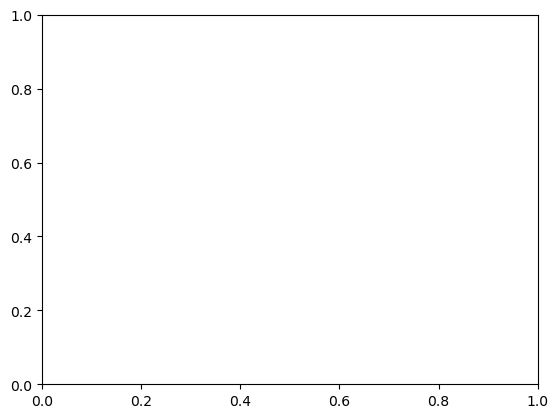

In [18]:
plt.plot(timesteps[5001:], lj/N)
plt.xlabel("Timestep")
plt.ylabel("Lennard Jones Potential")
plt.title("LJ/N vs Time - 300 chains")
plt.grid(True)
plt.show()

ValueError: x and y must have same first dimension, but have shapes (5000,) and (10001,)

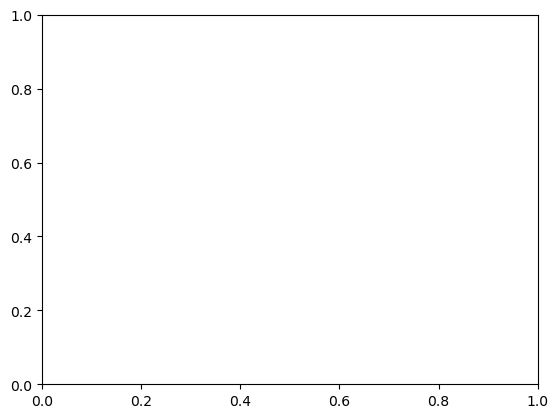

In [24]:
plt.plot(timesteps[5001:], PE/N)
plt.xlabel("Timestep")
plt.ylabel("PE/N")
plt.title("PE/N vs Time - 100 chains")
plt.grid(True)
plt.show()

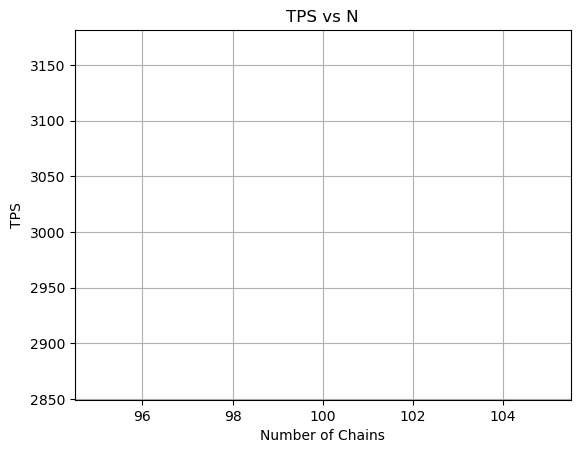

In [7]:
plt.plot(N, tps)
plt.xlabel("Number of Chains")
plt.ylabel("TPS")
plt.title("TPS vs N")
plt.grid(True)
plt.show()

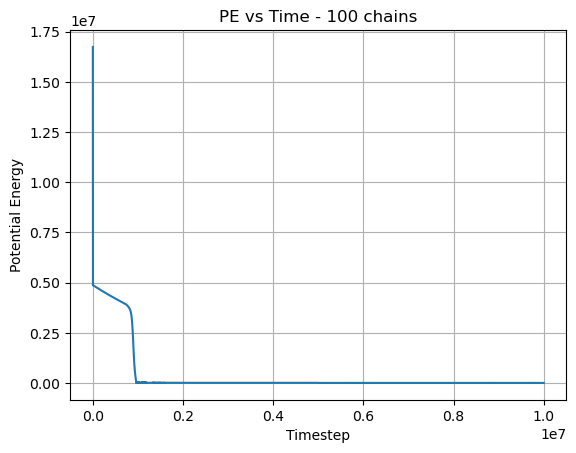

In [15]:
plt.plot(timesteps, PE)
plt.xlabel("Timestep")
plt.ylabel("Potential Energy")
plt.title("PE vs Time - 100 chains")
plt.grid(True)
plt.show()

In [3]:
def find_clusters(particles, r):
    clusters = []  # List to store clusters
    visited = set()  # Set to keep track of visited particles
    
    def dfs(particle_index, cluster):
        # Visit the current particle and add it to the cluster
        cluster.append(particle_index)
        visited.add(particle_index)
        
        # Search for nearby particles within cutoff distance
        for neighbor in get_neighbors(particle_index, particles, r):
            if neighbor not in visited:
                dfs(neighbor, cluster)

    # Iterate over all particles
    for i, particle in enumerate(particles):
        if i not in visited:
            cluster = []
            dfs(i, cluster)  # Find the cluster for this particle
            clusters.append(cluster)  # Store the identified cluster

    return clusters


In [ ]:
with gsd.hoomd.open(gsd_file, 'rb') as f:
    for i, frame in enumerate(f):
        positions = frame.particles.position  # Get positions for this frame
        clusters = find_clusters(positions, r_cut)  # Find clusters for this frame
        
        # Plotting code here (can animate or save as images)
        if i % 10 == 0:  # Plot every 10th frame
            plt.figure(figsize=(8, 6))
            for idx, cluster in enumerate(clusters):
                cluster_points = positions[cluster, :2]  # Plot only x, y (2D)
                plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {idx + 1}",
                            color=colors(idx), s=100)
            plt.title(f"Clusters at Frame {i}")
            plt.xlabel("X position")
            plt.ylabel("Y position")
            plt.legend()
            plt.grid(True)
            plt.show()
